In [5]:
import pandas as pd
import numpy as np
df = pd.read_excel("spy_options.xlsx")
df


,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,3M SOFR,Implied Vol,Unnamed: 5,Announcement Date,Ex-Date,Record Date,Paid Date,Dividend Amount,Frequency,Type
0,NaT,5.46,421.82,5.27638,12.576,NaN,NaT,2023-09-15,2023-09-18,2023-10-31,1.583169,Quarter,Income
1,2023-06-02,7.45,427.92,5.23034,12.570,NaN,2023-06-15,2023-06-16,2023-06-20,2023-07-31,1.638367,Quarter,Income
2,2023-06-05,7.67,427.10,5.25323,12.515,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
3,2023-06-06,6.64,428.03,5.23884,12.160,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
4,2023-06-07,6.64,426.55,5.23808,11.923,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2023-11-13,0.04,440.19,5.39021,11.844,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
115,2023-11-14,0.42,448.73,5.36937,11.507,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
116,2023-11-15,0.20,449.68,5.36710,10.215,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
117,2023-11-16,0.08,450.23,5.36693,10.190,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN


In [8]:
df = pd.read_excel("spy_options_6M.xlsx")
df

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,6M SOFR,Implied Vol,Unnamed: 5,Announcement Date,Ex-Date,Record Date,Paid Date,Dividend Amount,Frequency,Type
0,NaT,5.46,421.82,5.28528,12.576,NaN,NaT,2023-09-15,2023-09-18,2023-10-31,1.583169,Quarter,Income
1,2023-06-02,7.45,427.92,5.24547,12.570,NaN,2023-06-15,2023-06-16,2023-06-20,2023-07-31,1.638367,Quarter,Income
2,2023-06-05,7.67,427.10,5.28773,12.515,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
3,2023-06-06,6.64,428.03,5.27695,12.160,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
4,2023-06-07,6.64,426.55,5.27788,11.923,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2023-11-13,0.04,440.19,5.43478,11.844,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
115,2023-11-14,0.42,448.73,5.38077,11.507,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
116,2023-11-15,0.20,449.68,5.37501,10.215,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
117,2023-11-16,0.08,450.23,5.36347,10.190,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN


In [11]:
df = df[["Date","SPY US 11/17/23 C455 Equity", "SPY US Equity", "6M SOFR", "Implied Vol"]]
df

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,6M SOFR,Implied Vol
0,NaT,5.46,421.82,5.28528,12.576
1,2023-06-02,7.45,427.92,5.24547,12.570
2,2023-06-05,7.67,427.10,5.28773,12.515
3,2023-06-06,6.64,428.03,5.27695,12.160
4,2023-06-07,6.64,426.55,5.27788,11.923
...,...,...,...,...,...
114,2023-11-13,0.04,440.19,5.43478,11.844
115,2023-11-14,0.42,448.73,5.38077,11.507
116,2023-11-15,0.20,449.68,5.37501,10.215
117,2023-11-16,0.08,450.23,5.36347,10.190


# Calculate Delta

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def calculate_delta(row):
    S = row['SPY US Equity']
    r = row['6M SOFR'] / 100
    sigma = row['Implied Vol'] / 100
    T = (pd.to_datetime('11/17/23') - pd.to_datetime(row['Date'])).days / 365.0

    d1 = (np.log(S / 455) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

df['Option Delta'] = df.apply(calculate_delta, axis=1)

print(df)
df.to_csv("test.csv")


          Date  SPY US 11/17/23 C455 Equity  SPY US Equity  6M SOFR  \
0          NaT                         5.46         421.82  5.28528   
1   2023-06-02                         7.45         427.92  5.24547   
2   2023-06-05                         7.67         427.10  5.28773   
3   2023-06-06                         6.64         428.03  5.27695   
4   2023-06-07                         6.64         426.55  5.27788   
..         ...                          ...            ...      ...   
114 2023-11-13                         0.04         440.19  5.43478   
115 2023-11-14                         0.42         448.73  5.38077   
116 2023-11-15                         0.20         449.68  5.37501   
117 2023-11-16                         0.08         450.23  5.36347   
118 2023-11-17                         0.01         450.79  5.35821   

     Implied Vol  Option Delta  
0         12.576           NaN  
1         12.570      0.346871  
2         12.515      0.335097  
3         12.16

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/2334101673.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / 455) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))


# Calculate Gamma

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import norm


df['Option Gamma'] = np.nan

for i in range(1, len(df)):
    S = df.loc[i, 'SPY US Equity']
    X = 455
    r = df.loc[i, '6M SOFR'] / 100
    sigma = df.loc[i, 'Implied Vol'] / 100
    T = (df.loc[i, 'Date'] - pd.to_datetime(df.loc[i-1, 'Date'])).days / 365.0

    d1_gamma = (np.log(S / X) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))

    gamma = norm.pdf(d1_gamma) / (S * sigma * np.sqrt(T))

    df.at[i, 'Option Gamma'] = gamma

print(df[['Date', 'Option Gamma']])
df.to_csv("test.csv")


          Date  Option Gamma
0          NaT           NaN
1   2023-06-02           NaN
2   2023-06-05  1.850277e-08
3   2023-06-06  1.819959e-21
4   2023-06-07  1.121533e-24
..         ...           ...
114 2023-11-13  8.442271e-04
115 2023-11-14  1.106397e-02
116 2023-11-15  1.577224e-02
117 2023-11-16  2.502618e-02
118 2023-11-17  1.211570e-02

[119 rows x 2 columns]


# Calculate Theta - WRONG


          Date         Theta
0          NaT           NaN
1   2023-06-02     -0.082872
2   2023-06-05     -0.107159
3   2023-06-06     -0.183403
4   2023-06-07     -0.263640
..         ...           ...
114 2023-11-13  -8864.854038
115 2023-11-14 -10590.156745
116 2023-11-15 -12309.279621
117 2023-11-16 -17765.184767
118 2023-11-17           NaN

[119 rows x 2 columns]


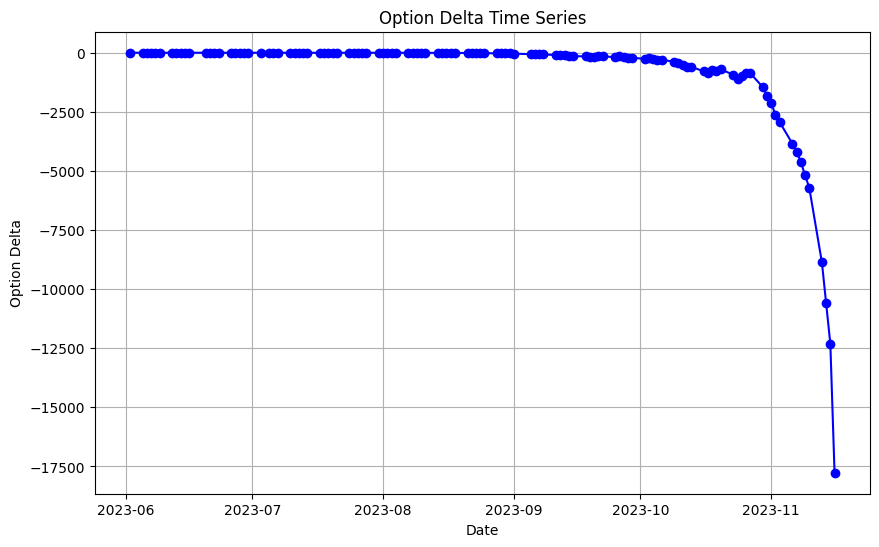

In [27]:
# Calculate time to expiration in years
df['Time_to_Expiration'] = (pd.to_datetime('2023-11-17') - df['Date']).dt.days / 365

# Calculate d1 and d2
df['d1'] = (np.log(df['SPY US Equity'] / 455) + (df['6M SOFR'] - 0.0 + (df['Implied Vol']**2) / 2) * df['Time_to_Expiration']) / (df['Implied Vol'] * np.sqrt(df['Time_to_Expiration']))
df['d2'] = df['d1'] - df['Implied Vol'] * np.sqrt(df['Time_to_Expiration'])

# Calculate theta
df['Theta'] = -df['SPY US Equity'] * np.exp(-0.0 * df['Time_to_Expiration']) * norm.pdf(df['d1']) * df['Implied Vol'] / (2 * np.sqrt(df['Time_to_Expiration'])) - \
              455 * np.exp(-df['6M SOFR'] * df['Time_to_Expiration']) * norm.pdf(df['d2']) * df['6M SOFR']

# Display the DataFrame with theta
print(df[['Date', 'Theta']])

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Theta'], marker='o', linestyle='-', color='b')
plt.title('Option Delta Time Series')
plt.xlabel('Date')
plt.ylabel('Option Delta')
plt.grid(True)
plt.show()

# Calculate Delta Hedging PnL

In [14]:
import pandas as pd

df['P&L Unhedged'] = 0.0
df['P&L Hedged'] = 0.0

for i in range(1, len(df)):
    # Calculate change in S and C
    delta_s = df.loc[i, 'SPY US Equity'] - df.loc[i - 1, 'SPY US Equity']
    delta_c = df.loc[i, 'SPY US 11/17/23 C455 Equity'] - df.loc[i - 1, 'SPY US 11/17/23 C455 Equity']

    pnl_unhedged = -delta_c

    pnl_hedged = -delta_c + df.loc[i - 1, 'Option Delta'] * delta_s

    df.at[i, 'P&L Unhedged'] = pnl_unhedged
    df.at[i, 'P&L Hedged'] = pnl_hedged

print(df)
df.to_csv("pnl_results.csv")


          Date  SPY US 11/17/23 C455 Equity  SPY US Equity  6M SOFR  \
0          NaT                         5.46         421.82  5.28528   
1   2023-06-02                         7.45         427.92  5.24547   
2   2023-06-05                         7.67         427.10  5.28773   
3   2023-06-06                         6.64         428.03  5.27695   
4   2023-06-07                         6.64         426.55  5.27788   
..         ...                          ...            ...      ...   
114 2023-11-13                         0.04         440.19  5.43478   
115 2023-11-14                         0.42         448.73  5.38077   
116 2023-11-15                         0.20         449.68  5.37501   
117 2023-11-16                         0.08         450.23  5.36347   
118 2023-11-17                         0.01         450.79  5.35821   

     Implied Vol  Option Delta  Option Gamma  P&L Unhedged  P&L Hedged  
0         12.576           NaN           NaN          0.00    0.000000  
1

In [15]:
df[['Date','SPY US 11/17/23 C455 Equity','SPY US Equity','P&L Unhedged','P&L Hedged']].head(20)

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,P&L Unhedged,P&L Hedged
0,NaT,5.46,421.82,0.00,0.000000
1,2023-06-02,7.45,427.92,-1.99,NaN
2,2023-06-05,7.67,427.10,-0.22,-0.504435
3,2023-06-06,6.64,428.03,1.03,1.341640
4,2023-06-07,6.64,426.55,-0.00,-0.500194
5,2023-06-08,6.63,429.13,0.01,0.829137
6,2023-06-09,6.87,429.90,-0.24,0.022959
7,2023-06-12,8.43,433.80,-1.56,-0.188778
8,2023-06-13,9.80,436.66,-1.37,-0.243381
9,2023-06-14,9.56,437.18,0.24,0.462269


In [16]:
print(df['P&L Hedged'].describe())
print()
print(df['P&L Unhedged'].describe())

count    118.000000
mean       0.041312
std        0.382109
min       -1.012427
25%       -0.133378
50%        0.031201
75%        0.206510
max        1.341640
Name: P&L Hedged, dtype: float64

count    119.000000
mean       0.045798
std        1.094054
min       -2.950000
25%       -0.385000
50%        0.020000
75%        0.670000
max        3.170000
Name: P&L Unhedged, dtype: float64


# Graph delta as a time series

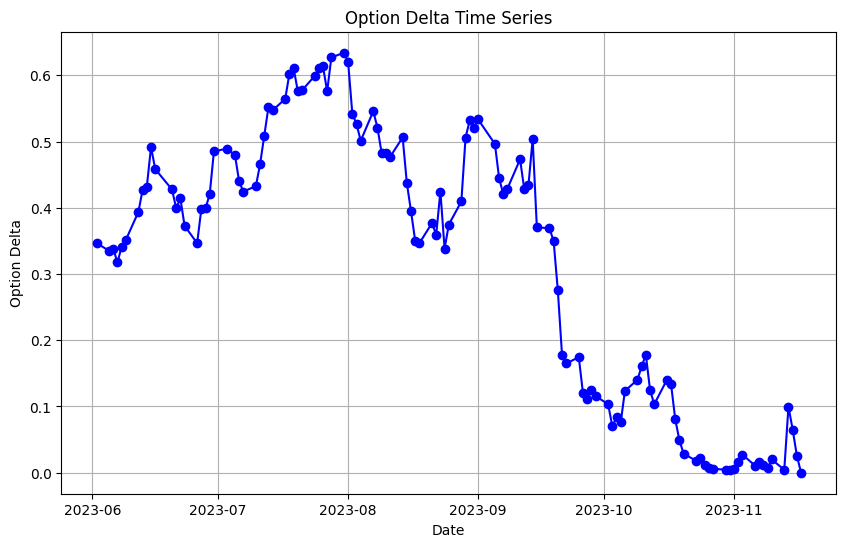

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Option Delta'], marker='o', linestyle='-', color='b')
plt.title('Option Delta Time Series')
plt.xlabel('Date')
plt.ylabel('Option Delta')
plt.grid(True)
plt.show()


# Graph gamma as a time series

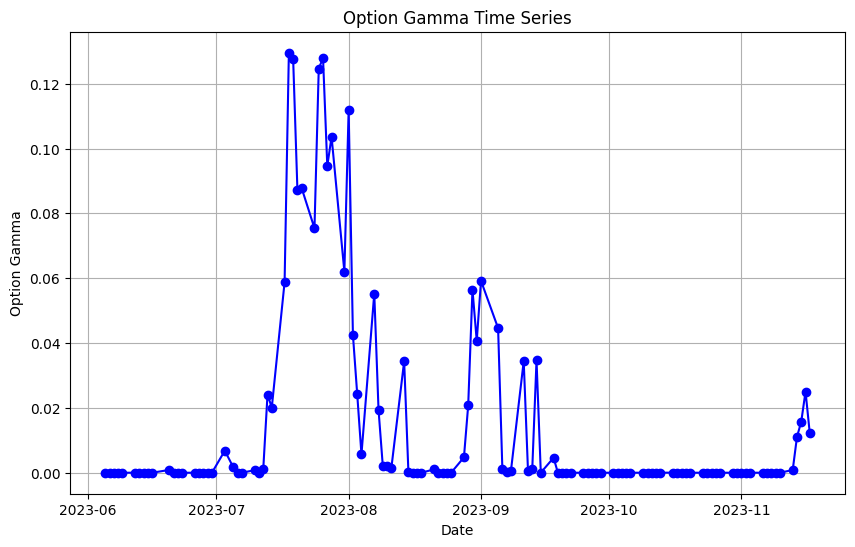

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Option Gamma'], marker='o', linestyle='-', color='b')
plt.title('Option Gamma Time Series')
plt.xlabel('Date')
plt.ylabel('Option Gamma')
plt.grid(True)
plt.show()

# Graph of stock price

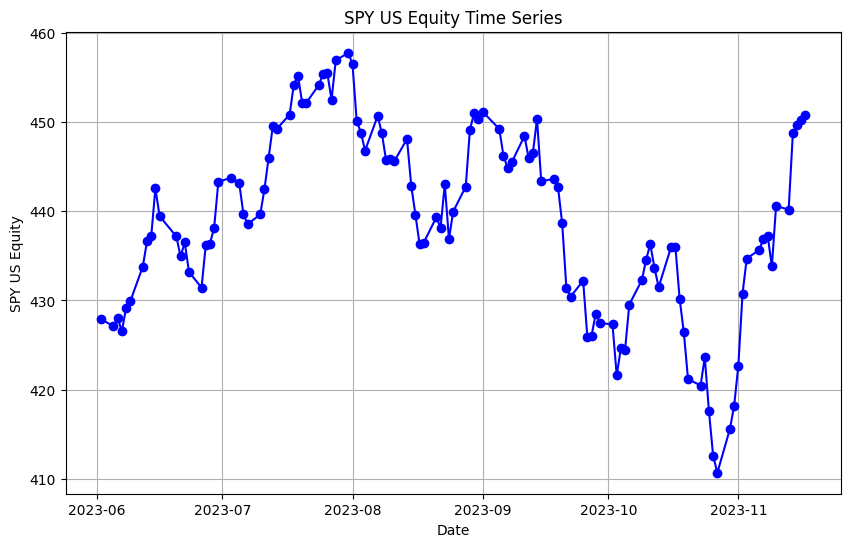

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SPY US Equity'], marker='o', linestyle='-', color='b')
plt.title('SPY US Equity Time Series')
plt.xlabel('Date')
plt.ylabel('SPY US Equity')
plt.grid(True)
plt.show()

# Plot log returns of SPY

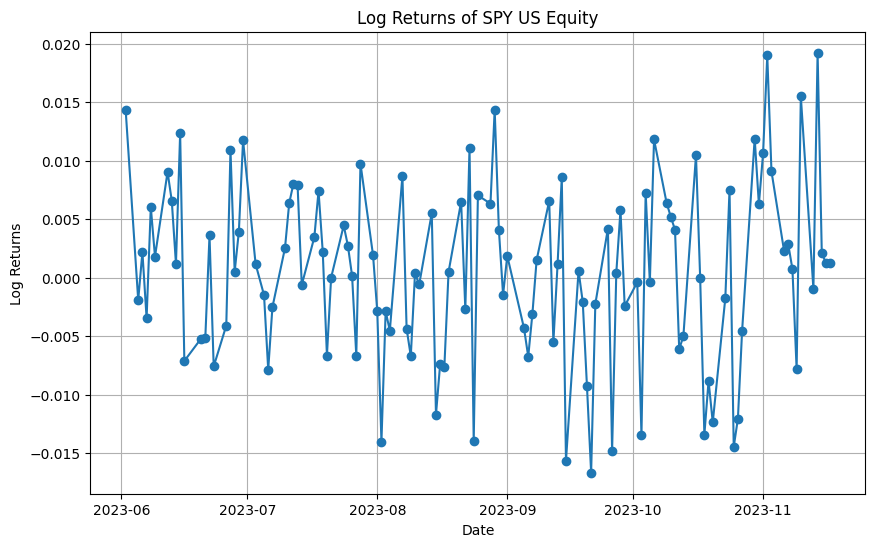

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df['Log Returns'] = np.log(df['SPY US Equity'] / df['SPY US Equity'].shift(1))

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Log Returns'], marker='o', linestyle='-')
plt.title('Log Returns of SPY US Equity')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()

# Plot 6m SOFR rate

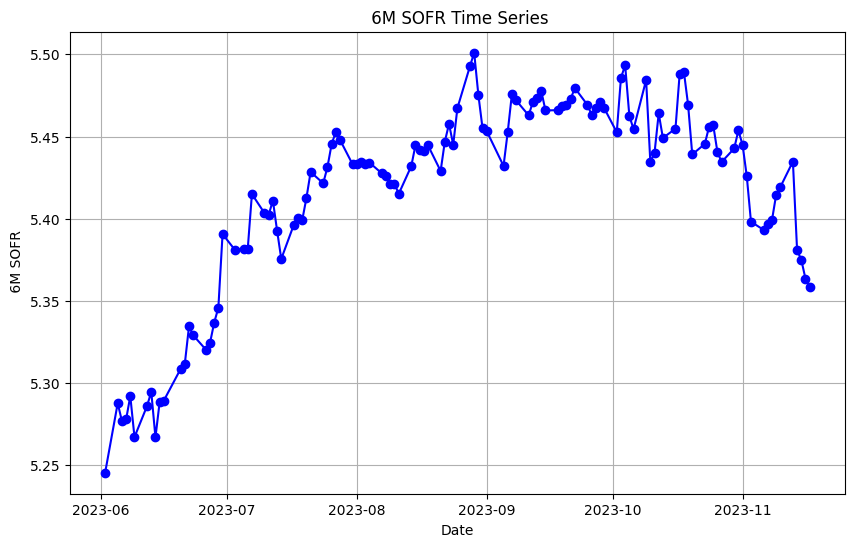

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['6M SOFR'], marker='o', linestyle='-', color='b')
plt.title(' 6M SOFR Time Series')
plt.xlabel('Date')
plt.ylabel(' 6M SOFR')
plt.grid(True)
plt.show()